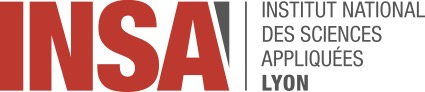
# P2I7: Chapitre 3 méthodes numériques
## Schémas à un pas et consistence
Camille Carvalho (INSA/ICJ)

In [1]:
#libraries to import
%matplotlib inline
from matplotlib import pyplot as plt
from math import sin, cos
import numpy as np
import sympy as sp

Pendant cette séance on considère le problème de Cauchy correspondant au pendule non amorti (non linéarisé) :
$$
   \ddot{\theta}(t) = -\frac{g}{\ell}\sin(\theta(t)), ~~~\mbox{ pour } t \ge 0, \quad \theta(0) = \alpha, ~~ \dot{\theta}(0) = 0,
$$
où $\alpha$ est l'angle initial auquel on lâche le pendule à l'instant initial $t=0$ avec une vitesse nulle.


# Exercice 3.6.1
Détaillez la stratégie de point fixe pour le schéma du point milieu et pour le problème du pendule ci-dessus.

**Solution.** On réécrit le problème comme un système du premier ordre
$$ {Y}' = \begin{bmatrix} y' \\ y'' \end{bmatrix} = \begin{bmatrix} y' \\ -\frac{g}{l}\sin(y) \end{bmatrix} = F(Y), \quad {Y}(0) = \begin{bmatrix} \alpha \\ 0 \end{bmatrix}
$$
On pose $\Phi(t, Y_i, Y_{i+1}, \Delta t) = F(t_{i} + \frac{\Delta t}{2}, \frac{Y_{i} + Y_{i+1}}{2})$ et l'on programme alors 
$$ Y_{i+1} = Y_{i} + {\Delta t}\Phi(t, Y_i, Y_{i+1}, \Delta t) , \quad i  = 1, \dots, N-1, \quad \Delta t = \frac{T}{N}, \quad Y_0 = Y(0)$$

La stratégie du point fixe (Newton-Raphson) nous donne le principe suivant:
$$ Y^{j+1}_{i+1} = Y_i + \Delta t \Phi(t, Y_i, Y^j_{i+1}, \Delta t)$$

# Section 3.8: pratique
Implémentez le shéma du point milieu sur le problème du pendule ci-dessus. Vous pourrez dessiner l'évolution de l'énergie totale qui à l'expression $\frac{\dot{\theta}^2(t)}{2} + \frac{g}{\ell}(1-\cos(\theta(t)))$. Si vous avez le temps, comparez également les résultats numériques obtenus avec le schéma du point milieu avec ceux obtenus avec un schéma de Verlet et de RK4.


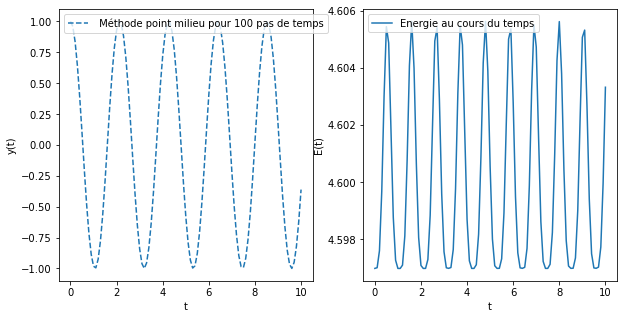

In [3]:
# SOLUTION (perso):
g=10; l=1; y0=[1, 0]; T=10; N=100;

dt=T/N;
y=[1.]                   # angle initial value
yp=[0.]                  # angular velocity initial value
E = [(yp[0]**2)/2 + (g/l)* (1-cos(y[0]))] # Energy initial value


for i in range(1, N+1):  # time iterations
    y_i = y[i-1]         # initial value for y[i] 
    yp_i = yp[i-1]       # initial value for yp[i]
    y_i_old = y_i; 
    yp_i_old = yp_i
    j = 0
    
    while ((j==0) or abs(y_i-y_i_old)+abs(yp_i-yp_i_old) > 1E-6):
        y_i_old  = y_i; yp_i_old = yp_i
        y_i = y[i-1] + dt * (yp[i-1]+yp_i_old)/2
        yp_i = yp[i-1] - dt * (g/l)*sin((y[i-1]+y_i_old)/2)
        j = j + 1
        if (j > 100):
            raise NameError('Subiterations did not converge')
    
    y.append(y_i)
    yp.append(yp_i)
    E.append( (yp[i]**2)/2 + (g/l)* (1- cos(y[i]) ) )
    
t=[i*dt for i in range(N+1)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(t, y, '--', label = f' Méthode point milieu pour {N} pas de temps')
ax1.legend(loc = 'upper left')
ax1.set_xlabel('t')
ax1.set_ylabel('y(t)')
ax2.plot(t, E, label = 'Energie au cours du temps')
ax2.set_xlabel('t')
ax2.set_ylabel('E(t)')
#ax2.set_ylim(3,6)
ax2.legend(loc = 'upper left')